In [1]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Load Data
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
## Describe the data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
## Check for Missing Value
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No Null Values are present

{'whiskers': [<matplotlib.lines.Line2D at 0x21722550c10>,
 'caps': [<matplotlib.lines.Line2D at 0x21722564310>,
 'boxes': [<matplotlib.lines.Line2D at 0x217225508b0>],
 'medians': [<matplotlib.lines.Line2D at 0x217225649d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21722564d30>],
 'means': []}

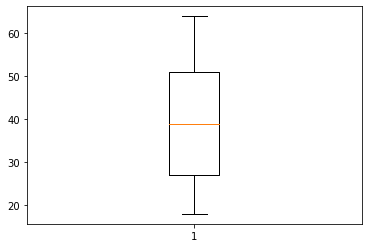

In [6]:
## Boxplot of age to check if we have any outliers
plt.boxplot(data['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21722637610>,
 'caps': [<matplotlib.lines.Line2D at 0x21722637cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x217226372b0>],
 'medians': [<matplotlib.lines.Line2D at 0x21722641370>],
 'fliers': [<matplotlib.lines.Line2D at 0x217226416d0>],
 'means': []}

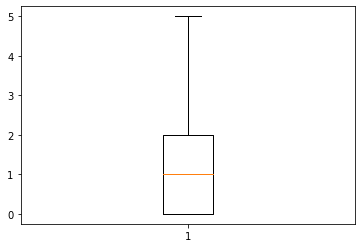

In [7]:
## Boxplot of children to check if we have any outliers
plt.boxplot(data['children'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21722690f40>,
 'caps': [<matplotlib.lines.Line2D at 0x217226a1640>,
 'boxes': [<matplotlib.lines.Line2D at 0x21722690be0>],
 'medians': [<matplotlib.lines.Line2D at 0x217226a1d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x217226ab0a0>],
 'means': []}

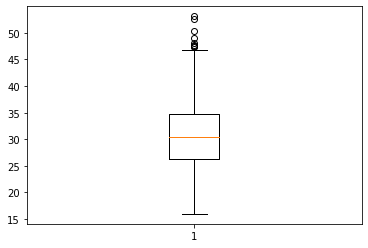

In [8]:
## Boxplot of children to check if we have any outliers
plt.boxplot(data['bmi'])

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables.

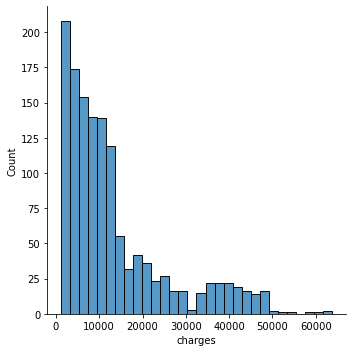

In [9]:
sns.displot(data['charges'])

In [10]:
## For validation
count=0
for i in data['charges']:
    if i <10000:
        count+=1
print(count)

712


As the charges is logf normally distributed ,we can convert it to normal distribution

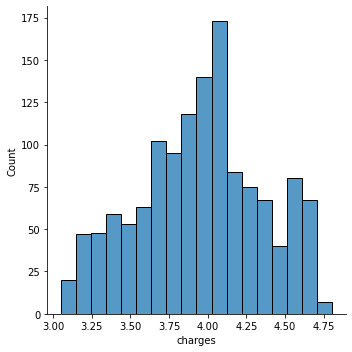

In [11]:
sns.displot(np.log10(data['charges']))

The get_dummies function is used to convert categorical variables into dummy or indicator variables. A dummy or indicator variable can have a value of 0 or 1.

In [12]:
### For doing encoding -creating copy of entire dataset
data_encode=data.copy()
data_encode.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
## Encoding the categorical variables
data_encode=pd.get_dummies(data=data_encode,columns=['sex','smoker','region'])
data_encode.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


As we have seen that charges are log normally distributed so we can use boxcox transformation to convert it to normal distribution 

In [14]:
## Import boxcox
from scipy.stats import boxcox

In [15]:
data_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [16]:
data_encode['charges'],lam= boxcox(data_encode['charges'])
data_encode.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,12.128980,1,0,0,1,0,0,0,1
1,18,33.770,1,8.808596,0,1,1,0,0,0,1,0
2,28,33.000,3,10.147521,0,1,1,0,0,0,1,0
3,33,22.705,0,12.534950,0,1,1,0,0,1,0,0
4,32,28.880,0,9.945637,0,1,1,0,0,1,0,0


In [17]:
## Define X and Y
X=data_encode.drop(columns='charges',axis=1)
Y=data_encode['charges']

In [18]:
!pip install --upgrade scipy

^C


In [19]:
## Import needed packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression

In [20]:
# Splitting training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [21]:
## Creating LinearRegression object and fitting the training data
Regressor=LinearRegression()
Regressor.fit(X_train,Y_train)

LinearRegression()

In [22]:
## get predictions for test data
Y_pred=Regressor.predict(X_test)

In [24]:
## Comparing it with actual truth value
score=r2_score(Y_test,Y_pred)
print(score)


0.776406023101184


We have got almost 77% accuracy

In [25]:
mean_squared_error(Y_test,Y_pred)

0.43366247188904655

In [26]:
Regressor.coef_

array([ 0.04952362,  0.02342928,  0.14614155,  0.04341706, -0.04341706,
       -1.16947611,  1.16947611,  0.17355876,  0.05422505, -0.14854857,
       -0.07923524])

In [27]:
Regressor.intercept_

9.076352039395982

In [28]:
VIF=1/(1-score)
print("Variance Inflation Factor=",VIF)

Variance Inflation Factor= 4.472392386725759


As VIF < 5 so there is no multicollinearity